In [1]:
import numpy as np

# read file
with open('data.txt', 'r') as myfile:
    text=myfile.read()
    
# split the input string into list of strings
text = text.split(sep=' ')

# leave only letters 
for i in range(len(text)):
    text[i]=''.join(letter for letter in text[i].lower() if 'a' <= letter <= 'z')

# delete empty strings
text = list(filter(None, text))

database = [] # for transformed text
metadata = [] # colouring
for i in range(len(text)):
    # add a new zero filled array, each element is for particular letter
    database.append(np.zeros(26)) 
    
    # check each letter in a word
    for letter in list(text[i]):
        # get a numerical representation of the letter (a is 0, c is 2, and so on)
        index = ord(letter) - 97
        # increace the value of the corresponding element
        database[i][index]+=1
    # store the length of the word
    metadata.append(len(text[i]))

# convert the list to numpy array
database = np.array(database)

In [2]:
%%time
#from sklearn.manifold import TSNE #slow
from MulticoreTSNE import MulticoreTSNE as TSNE
t = TSNE().fit_transform(database)

Wall time: 359 ms


In [3]:
%%time
%matplotlib
#load libraries to show plots
import numpy as np
import matplotlib.pyplot as plt

#2d scatter plot
def scatter(x, xlabel="", ylabel="", color_data=metadata, cmap="viridis"):
    f = plt.figure()
    f.suptitle('t-SNE visualization', fontsize=20)
    ax = plt.subplot(aspect='equal')
    ax.scatter(x[:,0], x[:,1], cmap=cmap, c=color_data)
    ax.set_xlabel(xlabel, fontsize = 14)
    ax.set_ylabel(ylabel, fontsize = 14)
    for i in range(len(x)):
        ax.annotate(text[i], (x[i,0], x[i,1]), xytext=(3,3),
                    textcoords="offset points", ha="center")

Wall time: 490 ms


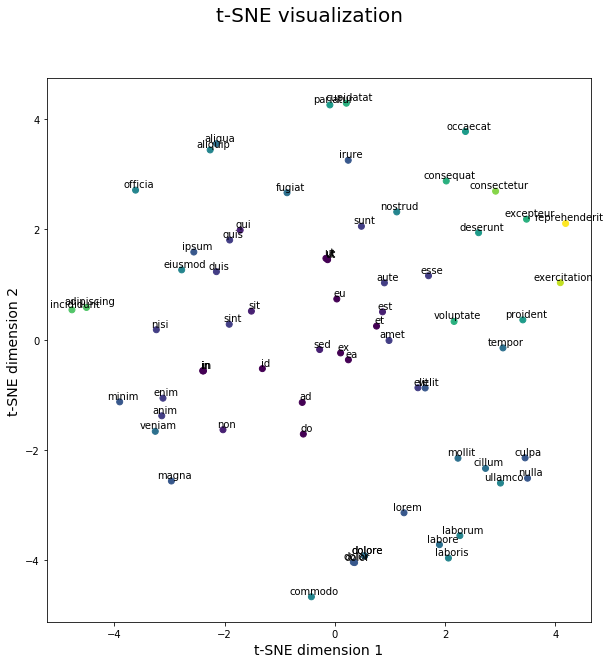

In [4]:
scatter(t, "t-SNE dimension 1", "t-SNE dimension 2", color_data=metadata)